<a href="https://colab.research.google.com/github/yuval728/MLOA/blob/main/Exp1/MLOAExp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Yuval Mehta C057
#Div-B Sem-X
#Exp1 MLOA

In [1]:
import pandas as pd

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt

In [18]:

if int(input('1.VS or 2.GC?'))==1:
    df=pd.read_csv('train.csv')
    testdf=pd.read_csv('test.csv')
    # ansdf=pd.read_csv('')
else:
    df=pd.read_csv('/content/train.csv')
    testdf=pd.read_csv('/content/test.csv')
    ansdf=pd.read_csv('/content/sample_submission.csv')



1.VS or 2.GC?2


In [16]:
df.head()
testdf.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
ansdf.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [7]:
y=df.label
X=df.iloc[:,1:]

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=0)

In [8]:
def train_model(model,params={}):
  grid=GridSearchCV(model,param_grid=params,n_jobs=-1,refit=True,cv=3,verbose=1)
  grid.fit(x_train,y_train)
  return grid

def report(model):
  print(model.best_params_)
  preds=model.predict(x_test)
  print(metrics.accuracy_score(y_test,preds))
  cm=metrics.confusion_matrix(y_test,preds)
  print(cm)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
  cm_display.plot()
  plt.show()
  print(metrics.classification_report(y_test,preds))


Fitting 3 folds for each of 4 candidates, totalling 12 fits
{'n_neighbors': 3}
0.9685714285714285
[[1004    0    2    0    1    2    5    0    1    0]
 [   0 1183    3    1    0    0    1    1    1    0]
 [  11   10 1037    1    0    0    3   13    2    0]
 [   1    0    5 1040    0    8    1    5    5    5]
 [   1    9    0    0  990    0    4    0    0   30]
 [   1    0    0   11    2  902   12    0    0    2]
 [   1    1    0    0    2    3 1037    0    0    0]
 [   1   12    6    0    3    0    0 1098    0    9]
 [   5   10    2   25    3   20    6    1  915    8]
 [   3    2    3    4   12    3    1   24    0  964]]


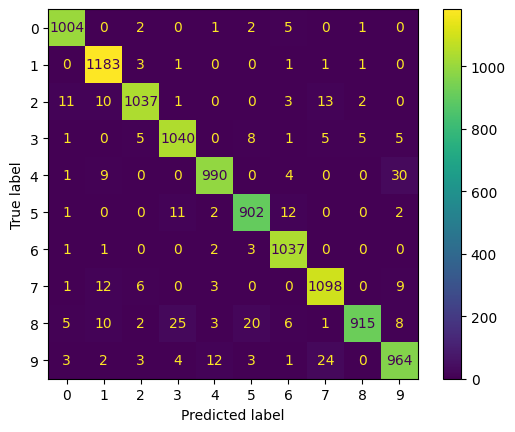

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1015
           1       0.96      0.99      0.98      1190
           2       0.98      0.96      0.97      1077
           3       0.96      0.97      0.97      1070
           4       0.98      0.96      0.97      1034
           5       0.96      0.97      0.97       930
           6       0.97      0.99      0.98      1044
           7       0.96      0.97      0.97      1129
           8       0.99      0.92      0.95       995
           9       0.95      0.95      0.95      1016

    accuracy                           0.97     10500
   macro avg       0.97      0.97      0.97     10500
weighted avg       0.97      0.97      0.97     10500



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=train_model(KNeighborsClassifier(),{'n_neighbors':[3,5,7,10]})
report(knn)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


c:\Users\Yuval\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'cv': 3, 'error_score': nan, 'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 100, 'estimator__multi_class': 'multinomial', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': None, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(multi_class='multinomial'), 'n_jobs': -1, 'param_grid': {'solver': ['newton-cg', 'saga', 'sag'], 'C': [0.1, 1, 10]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 1}
0.9173333333333333
[[ 969    0    5    3    2    5   19    4    7    1]
 [   0 1163    7    2    1    1    4    0   10    2]
 [   9   14  971   21    8    5   11   12   19    7]
 [   2    3   24  956    2   42    2    6   19   14]
 [   3    9    7    1  953    3   11   

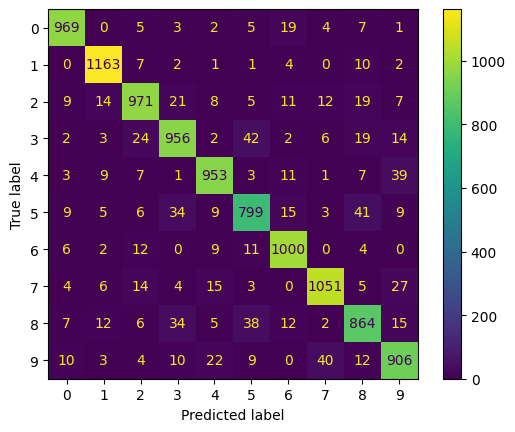

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1015
           1       0.96      0.98      0.97      1190
           2       0.92      0.90      0.91      1077
           3       0.90      0.89      0.90      1070
           4       0.93      0.92      0.93      1034
           5       0.87      0.86      0.87       930
           6       0.93      0.96      0.94      1044
           7       0.94      0.93      0.94      1129
           8       0.87      0.87      0.87       995
           9       0.89      0.89      0.89      1016

    accuracy                           0.92     10500
   macro avg       0.92      0.92      0.92     10500
weighted avg       0.92      0.92      0.92     10500



In [ ]:
from sklearn.linear_model import LogisticRegression

LR=train_model(LogisticRegression(penalty='l2',multi_class='multinomial',),{'solver':['newton-cg','saga','sag'],'C':[0.1,1,10]})
report(LR)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'C': 1, 'kernel': 'rbf'}
0.9748571428571429
[[1000    0    2    0    2    3    4    0    4    0]
 [   0 1178    5    3    0    0    1    1    2    0]
 [   2    1 1055    2    1    1    0    7    8    0]
 [   1    2   10 1023    0   14    2    3   12    3]
 [   1    4    2    0 1004    1    4    2    0   16]
 [   1    0    0    5    1  913    8    0    1    1]
 [   4    0    0    0    2    6 1030    0    2    0]
 [   1    5    7    1    8    2    0 1091    3   11]
 [   3    4    3    5    3    6    3    0  967    1]
 [   5    2    2    4   10    2    0   14    2  975]]


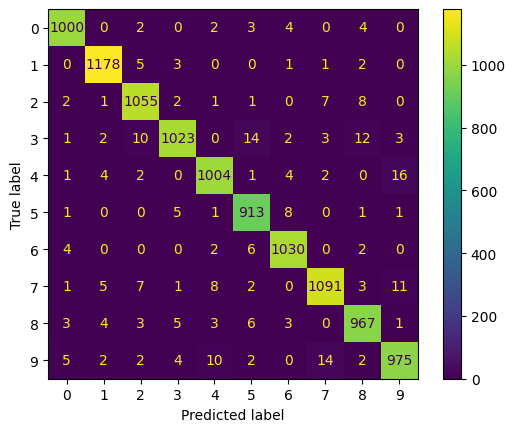

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1015
           1       0.98      0.99      0.99      1190
           2       0.97      0.98      0.98      1077
           3       0.98      0.96      0.97      1070
           4       0.97      0.97      0.97      1034
           5       0.96      0.98      0.97       930
           6       0.98      0.99      0.98      1044
           7       0.98      0.97      0.97      1129
           8       0.97      0.97      0.97       995
           9       0.97      0.96      0.96      1016

    accuracy                           0.97     10500
   macro avg       0.97      0.97      0.97     10500
weighted avg       0.97      0.97      0.97     10500



In [ ]:
from sklearn.svm import SVC

SC= train_model(SVC(),params={'kernel':['rbf'],'C':[1,0.5]})
report(SC)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
{'max_depth': 15}
0.8549523809523809
[[ 911    3   15   18    8   21    7    5   14   13]
 [   1 1134   14   14    5    7    2    2    7    4]
 [  19   15  884   24   17   20   32   26   29   11]
 [   3   12   36  866   12   64    7   24   31   15]
 [   6    9   14    5  868   16   16   17   30   53]
 [  10    4   11   46    9  750   27    8   30   35]
 [  18    7   23    3   18   25  934    4   11    1]
 [   6    9   29    7   14    9    3 1000   10   42]
 [  12   19   24   42   24   34   18   10  773   39]
 [   6    4    8   19   36   22    5   35   24  857]]


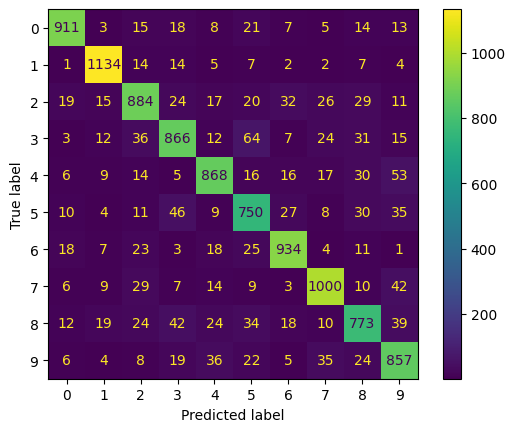

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1015
           1       0.93      0.95      0.94      1190
           2       0.84      0.82      0.83      1077
           3       0.83      0.81      0.82      1070
           4       0.86      0.84      0.85      1034
           5       0.77      0.81      0.79       930
           6       0.89      0.89      0.89      1044
           7       0.88      0.89      0.88      1129
           8       0.81      0.78      0.79       995
           9       0.80      0.84      0.82      1016

    accuracy                           0.85     10500
   macro avg       0.85      0.85      0.85     10500
weighted avg       0.86      0.85      0.85     10500



In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT=train_model(DecisionTreeClassifier(),params={'max_depth':list(range(5,30)) })
report(DT)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'learning_rate': 'constant'}
0.9547619047619048
[[411   0   2   1   0   2   1   1   2   2]
 [  0 467   1   1   1   0   1   1   1   0]
 [  4   5 393   4   0   0   0   2   1   0]
 [  0   1  10 400   0   7   1   5   1   1]
 [  1   1   4   0 404   0   4   1   2  12]
 [  0   0   1   7   0 366   5   1   0   2]
 [  1   0   0   1   2   4 404   0   0   0]
 [  0   2   2   2   2   2   0 448   2   9]
 [  1   4   8   3   0   7   5   2 348   6]
 [  3   1   0   1   5   2   1   8   4 369]]


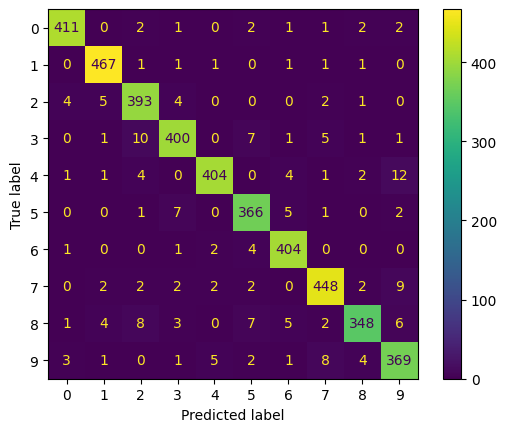

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       422
           1       0.97      0.99      0.98       473
           2       0.93      0.96      0.95       409
           3       0.95      0.94      0.95       426
           4       0.98      0.94      0.96       429
           5       0.94      0.96      0.95       382
           6       0.96      0.98      0.97       412
           7       0.96      0.96      0.96       469
           8       0.96      0.91      0.93       384
           9       0.92      0.94      0.93       394

    accuracy                           0.95      4200
   macro avg       0.95      0.95      0.95      4200
weighted avg       0.96      0.95      0.95      4200



In [9]:
from sklearn.neural_network import MLPClassifier
mlp=train_model(MLPClassifier(activation='relu',solver='adam'),{'learning_rate':['constant','adaptive'],})
report(mlp)

**Observation and Learning**

When comparing all models implemented above, support vector machine performed the best with accuracy score of 97.5% and decision tree performed the worst
with accuracy score of 85.5%.


*   Logistic regression was not suitable for this problem because in train data even small fluctuation can cause change in output and in logistic it generates a arbitrary line which does not provide accurate classification.
*   Decision tree was also not suitable for this problem because it will generate branches for small fluctutations in data which can cause overfitting.
*   KNN was suitable as it was able to classify based on clustered data which helped to avoid overfitting and therefore gave better accuracy
*   SVC was the most suitable model as it was able to provide the best classification line and in turn gave the best accuracy
*   MLP or multilayer perceptron was also suitable and can provide the best accuracy based on parameter tuning










**Conclusion**

In conclusion, building a handwritten digit recognition system using machine learning in Python involves selecting the appropriate dataset, preprocessing the data, choosing a suitable model, training the model, evaluating its performance, and developing a user interface for interactive use. These steps can be adapted and improved upon based on the specific requirements and constraints of the project.

In [2]:
# Question of curiosity

dp = []
res = []
original = []
total_size = int(0)

def possible(index, curr_sum, curr_size):

    index = int(index)
    curr_sum = int(curr_sum)
    curr_size = int(curr_size)

    global dp, res

    # Base cases
    if curr_size == 0:
        return (curr_sum == 0)
    if index >= total_size:
        return False

    if dp[index][curr_sum][curr_size] == False:
        return False

    if curr_sum >= original[index]:
        res.append(original[index])

        if possible(index + 1,
                    curr_sum - original[index],
                    curr_size - 1):
            return True

        res.pop()

    if possible(index + 1, curr_sum, curr_size):
        return True

    dp[index][curr_sum][curr_size] = False
    return False

def partition(Vec):

    global dp, original, res, total_size

    Vec.sort()

    if len(original) > 0:
        original.clear()

    original = Vec

    if len(dp) > 0:
        dp.clear()
    if len(res) > 0:
        res.clear()

    total_sum = 0
    total_size = len(Vec)

    for i in range(total_size):
        total_sum += Vec[i]

    dp = [[[True for _ in range(total_size)]
                 for _ in range(total_sum + 1)]
                 for _ in range(len(original))]

    for i in range(1, total_size):

        if (total_sum * i) % total_size != 0:
            continue

        Sum_of_Set1 = (total_sum * i) / total_size


        if possible(0, Sum_of_Set1, i):

            ptr1 = 0
            ptr2 = 0
            res1 = res
            res2 = []

            while ptr1 < len(Vec) or ptr2 < len(res):
                if (ptr2 < len(res) and
                    res[ptr2] == Vec[ptr1]):
                    ptr1 += 1
                    ptr2 += 1
                    continue

                res2.append(Vec[ptr1])
                ptr1 += 1

            ans = []
            ans.append(res1)
            ans.append(res2)

            return ans

    ans = []
    return ans


Vec = [ 1, 7, 15, 29, 11, 9 ]

sol = partition(Vec)

if len(sol) > 0:
    print(sol)
else:
    print("-1")

[[9, 15], [1, 7, 11, 29]]
